# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Linda Magdalena
- **Email:** lindamagdalena90@students.unnes.ac.id
- **ID Dicoding:** lindamagda

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi jumlah penyewaan sepeda di setiap musim?
- Apakah ada hubungan antara kondisi cuaca dan jumlah penyewaan sepeda?
- Apakah ada jam tertentu di mana permintaan penyewaan sepeda mencapai puncaknya dan paling rendah?

## Import Semua Packages/Library yang Digunakan

In [662]:
# mengimport Library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [663]:
day_df = pd.read_csv("/content/sample_data/day.csv") # Membaca dataset day
day_df.head() #menampilkan 5 data teratas

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [664]:
hour_df = pd.read_csv("/content/sample_data/hour.csv") # Membaca dataset hour
hour_df.head() # menampilkan 5 data teratas

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset **day_df** berisi data harian, sedangkan **hour_df** berisi data per jam yang lebih detail untuk analisis penyewaan sepeda.
- Keduanya memiliki kolom yang sama seperti musim, tahun, bulan, dan kondisi cuaca, tetapi **hour_df** juga mencakup jam dan jumlah penyewa kasual serta penyewa yang terdaftar.

### Assessing Data

In [665]:
# Menampilkan informasi mengenai dataset day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [666]:
# Menghitung jumlah nilai hilang atau missing value di dataset day
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [667]:
# Menampilkan informasi mengenai dataset hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [668]:
# Menghitung jumlah nilai hilang atau missing value di dataset hour
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [669]:
# Menghitung jumlah data duplikat pada dataset day dan hour
print("Duplikasi data: ", hour_df.duplicated().sum())
print("Duplikasi data: ", day_df.duplicated().sum())

Duplikasi data:  0
Duplikasi data:  0


In [670]:
# Menampilkan statistik deskriptif untuk dataset day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [671]:
# Menampilkan statistik untuk dataset hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing value pada dataset day_df dan hour_df
- Tidak ada duplicate data pada dataset day_df dan hour_df

### Cleaning Data

In [672]:
# Menghapus kolom yang tidak diperlukan dari dataset day
day_df.drop(columns=['instant','casual', 'registered', 'temp', 'atemp'], inplace=True)

In [673]:
# Menampilkan statistik setelah penghapusan kolom
day_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.972500,0.507463,8714.000000


In [674]:
# Menghapus kolom yang tidak diperlukan dari dataset hour
hour_df.drop(columns=['instant', 'casual', 'registered', 'temp', 'atemp'], inplace=True)

In [675]:
# Menampilkan statistik deskriptif setelah penghapusan kolom
day_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.972500,0.507463,8714.000000


In [676]:
# mengonversi beberapa kolom dalam DataFrame menjadi tipe data kategori
for col in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']:
    day_df[col] = day_df[col].astype('category')
    hour_df[col] = hour_df[col].astype('category')

**Insight:**
- kolom instant, casual, registered, temp, dan atemp dihapus karena tidak diperlukan dalam analisis ini
- kolom season, yr, mnth, holiday, weekday, dan weathershit diubah menjadi tipe data kategori karena akan diperlukan untuk pengelompokan

## Exploratory Data Analysis (EDA)

### Day dataset

In [677]:
# menampilkan rangkuman parameter statistik
day_df.describe(include='all')

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,hum,windspeed,cnt
count,731,731.0,731.0,731.0,731.0,731.0,731.000000,731.0,731.000000,731.000000,731.000000
unique,731,4.0,2.0,12.0,2.0,7.0,NaN,3.0,NaN,NaN,NaN
top,2011-01-01,3.0,1.0,1.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN
freq,1,188.0,366.0,62.0,710.0,105.0,NaN,463.0,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.683995,NaN,0.627894,0.190486,4504.348837
std,NaN,NaN,NaN,NaN,NaN,NaN,0.465233,NaN,0.142429,0.077498,1937.211452
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.022392,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.520000,0.134950,3152.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.626667,0.180975,4548.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.730209,0.233214,5956.000000


In [678]:
# Mengubah nilai musim ke nama musim
day_df['season_name'] = day_df['season'].cat.rename_categories({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

In [679]:
# Menghitung rata-rata penggunaan sepeda per musim
penggunaan_permusim= day_df.groupby('season_name', observed=False)['cnt'].mean()

# Menghitung total rata-rata penggunaan sepeda
total_avg_penggunaan = penggunaan_permusim.sum()

# Menghitung persentase rata-rata penggunaan sepeda berdasarkan musim
persentase_penggunaan = (penggunaan_permusim / total_avg_penggunaan) * 100

# Menampilkan hasil dalam persen
print("Persentase Rata-rata Penggunaan Sepeda per Musim pada dataset day:")
print(persentase_penggunaan)


Persentase Rata-rata Penggunaan Sepeda per Musim pada dataset day:
season_name
Spring    14.492419
Summer    27.783132
Fall      31.411459
Winter    26.312991
Name: cnt, dtype: float64


**Insight:**
- Penggunaan sepeda tertinggi terjadi pada musim gugur (Fall) dengan rata-rata penggunaan mencapai 31.4%, diikuti oleh Spring dengan rata-rata penyewaaan mencapai 14,5%


### Hour dataset

In [680]:
# menampilkan rangkuman parameter statistik
hour_df.describe(include='all')

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,hum,windspeed,cnt
count,17379,17379.0,17379.0,17379.0,17379.000000,17379.0,17379.0,17379.000000,17379.0,17379.000000,17379.000000,17379.000000
unique,731,4.0,2.0,12.0,NaN,2.0,7.0,NaN,4.0,NaN,NaN,NaN
top,2011-01-01,3.0,1.0,5.0,NaN,0.0,6.0,NaN,1.0,NaN,NaN,NaN
freq,24,4496.0,8734.0,1488.0,NaN,16879.0,2512.0,NaN,11413.0,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,0.682721,NaN,0.627229,0.190098,189.463088
std,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,0.465431,NaN,0.192930,0.122340,181.387599
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,0.000000,NaN,0.480000,0.104500,40.000000
50%,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,1.000000,NaN,0.630000,0.194000,142.000000
75%,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,1.000000,NaN,0.780000,0.253700,281.000000


In [681]:
# Mengubah nama kategori
hour_df['weathersit'] = hour_df['weathersit'].cat.rename_categories({
    1: 'Clear',
    2: 'Mist',
    3: 'Light snow',
    4: 'Heavy rain'
})

In [682]:
# Menghitung statistik deskriptif berdasarkan kondisi cuaca
mean_counts = hour_df.groupby('weathersit', observed=True)['cnt'].mean().reset_index()


In [683]:
# Menghitung statistik berdasarkan cuaca
stat_cuaca = hour_df.groupby('weathersit', observed=True)['cnt'].describe()
print("Statistik Jumlah Penyewaan Sepeda berdasarkan kondisi cuaca:")
print(stat_cuaca)

Statistik Jumlah Penyewaan Sepeda berdasarkan kondisi Cuaca:
              count        mean         std   min   25%    50%    75%    max
weathersit                                                                  
Clear       11413.0  204.869272  189.487773   1.0  46.0  159.0  304.0  977.0
Mist         4544.0  175.165493  165.431589   1.0  40.0  133.0  257.0  957.0
Light snow   1419.0  111.579281  133.781045   1.0  21.0   63.0  152.5  891.0
Heavy rain      3.0   74.333333   77.925178  23.0  29.5   36.0  100.0  164.0


**Insight:**
- Cuaca clear atau cerah merupakan yang terbanyak jumlah penyewaannya. Rata-rata penyewaan saat cuaca clear adalah 204,87, menunjukkan bahwa orang lebih suka menyewa sepeda saat cuaca baik.
- Rata-rata penyewaan pada kondisi Heavy Rain atau hujan lebat sangat rendah, hanya 74,33, yang menunjukkan cuaca buruk membuat orang kurang meminati menyewa sepeda.
- Pada penyewaan cuaca mist atau berkabut, penyewaan masih tergolong tinggi tetapi dibawah cuaca clear.
- Penyewaan pada cuaca light snow atau salju ringan cukup rendah dengan rata-rata 111,58, menunjukkan bahwa salju juga mengurangi minat orang untuk menyewa sepeda.

In [684]:
# Menghitung total penyewaan sepeda berdasarkan jam
total_penyewaan = hour_df.groupby('hr')['cnt'].sum().reset_index()

In [685]:
total_penyewaan['hr'] = total_penyewaan['hr'].astype(int)  # mengubah tipe data pada jam menjadi integer
all_hours = pd.DataFrame({'hr': range(24)})  # Dataframe untuk jam 0-23
total_penyewaann = all_hours.merge(total_penyewaan, on='hr', how='left').fillna(0)

In [686]:
# menampilkan jumlah penyewaan sepeda berdasarkan jam
print("Penyewaan Sepeda Berdasarkan Jam:")
print(total_penyewaan)

Penyewaan Sepeda Berdasarkan Jam:
    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


**insight**
- Dapat diketahui bahwa penyewaan sepeda tertinggi terjadi pada sekitar jam 17.00 dengan jumlah penyewaan mencapai 336.860. Sedangkan penyewaan terendah terjadi pada sekitar jam 04.00 dengan jumlah penyewaan mencapai 4.428

## Visualization & Explanatory Analysis

### Pertanyaan 1:

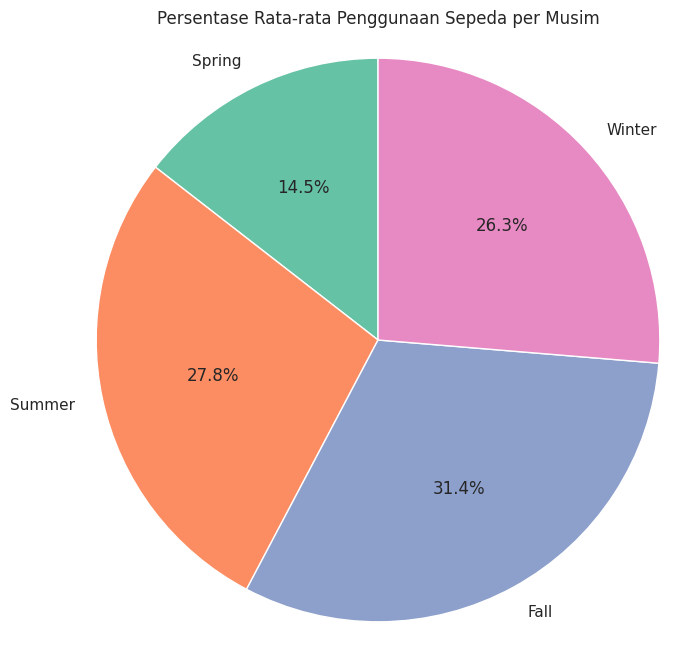

In [687]:
# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(persentase_penggunaan, labels=penggunaan_permusim.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))

# Menambahkan judul
plt.title('Persentase Rata-rata Penggunaan Sepeda per Musim')

# Menampilkan pie chart
plt.axis('equal')  # Untuk memastikan pie chart berbentuk lingkaran
plt.show()

**Insight**
- Dari chart diatas menunjukkan bahwa musim gugur atau Fall memiliki jumlah rata-rata penyewaan tertinggi, sedangkan musim semi atau spring memiliki jumlah rata-rata penyewaan terendah.

### Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

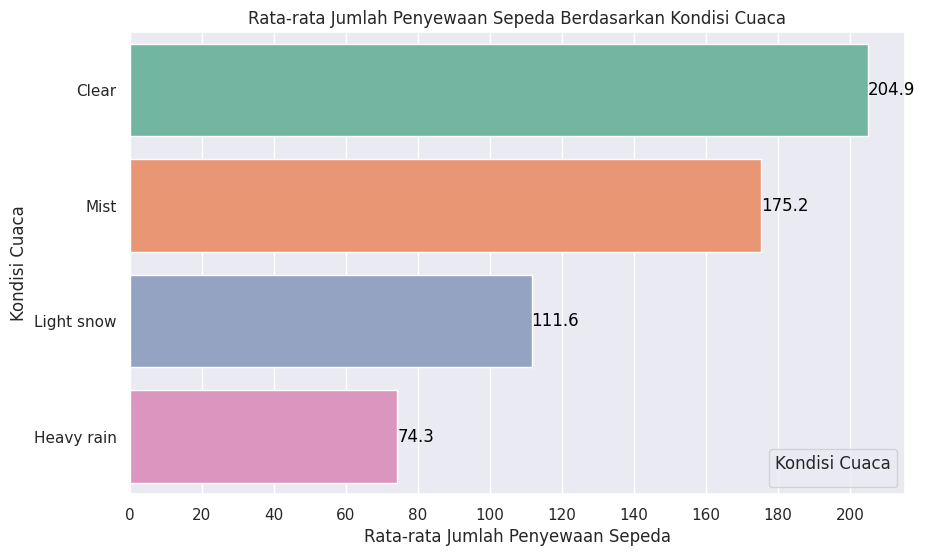

In [699]:
# Membuat bar chart dengan warna berbeda untuk setiap kategori cuaca
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='cnt', y='weathersit', data=mean_counts, hue='weathersit', palette='Set2', dodge=False)

# Menambahkan label
for index, row in mean_counts.iterrows():
    plt.text(row['cnt'], index, f"{row['cnt']:.1f}", color='black', ha='left', va='center')

plt.title('Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.ylabel('Kondisi Cuaca')

# Mengatur ticks pada sumbu x
plt.xticks(ticks=np.arange(0, mean_counts['cnt'].max() + 1, step=20))
plt.grid(axis='x')

# Menampilkan grafik
plt.legend(title='Kondisi Cuaca')  # Menambahkan legend untuk jelas
plt.show()


**Insight:**
- Dapat diketahui cuaca clear merupakan cuaca dengan penyewaan sepeda tertinggi dengan rata-rata mencapai 204.9
- Cuaca mist merupakan cuaca dengan penyewaan sepeda  tertinggi kedua dengan rata-rata mencapai 175.2
- Cuaca Light snow merupakan cuaca dengan penyewaan tertinggi ketiga dengan rata-rata mencapai 111.6.
- Heavy Rain merupakan cuaca dengan penyewaan terendah dengan rata-rata mencapai 74.3

### Pertanyaan 3:

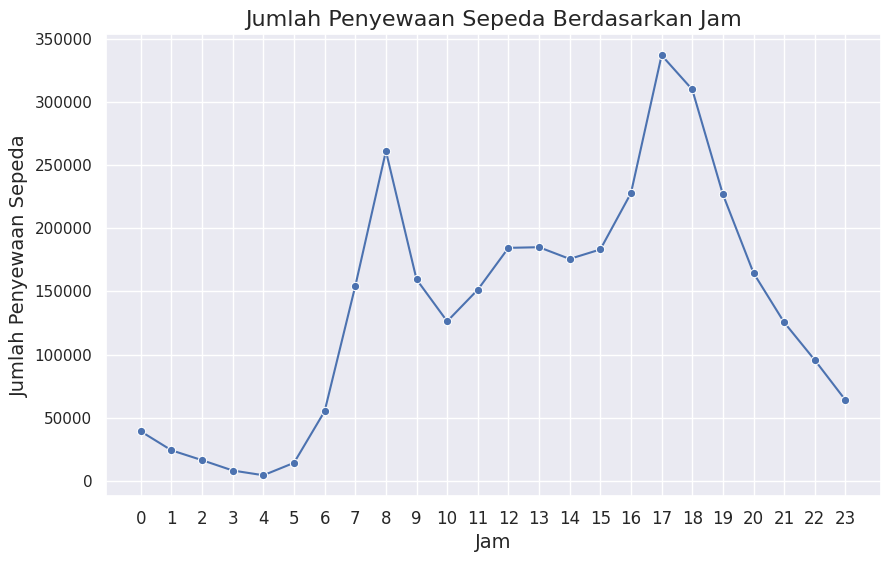

In [690]:
# Membuat chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data = total_penyewaan, marker='o', color='b')

# Mengatur judul dan label
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Jam', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=14)
plt.xticks(range(24), fontsize=12)  # Menampilkan label jam
plt.grid()

# Menampilkan grafik
plt.show()

**Insight**
- Berdasarkan grafik diatas dapat diketahui bahwa penyewaan tertinggi terjadi pada sekitar jam 17.00 dan penyewaan terendah terjadi pada sekitar jam 04.00.

## Analisis Lanjutan (Opsional)

### Bagaimana Pengaruh Kelembapan udara pada penyewaan sepeda?

In [691]:
# Membuat bin untuk kelembaban
bins_humidity = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels_humidity = ['Very Dry', 'Dry', 'Normal', 'Humid', 'Very Humid']

# Mengelompokkan kolom 'hum' menjadi kategori
hour_df['humidity_category'] = pd.cut(hour_df['hum'], bins=bins_humidity, labels=labels_humidity)

# Menghitung rata-rata penggunaan sepeda berdasarkan kelompok kelembaban
humidity_usage_category = hour_df.groupby('humidity_category', observed=True)['cnt'].mean().reset_index()

# Menampilkan hasil
print("Rata-rata penggunaan sepeda berdasarkan kelompok kelembaban:")
print(humidity_usage_category)



Rata-rata penggunaan sepeda berdasarkan kelompok kelembaban:
  humidity_category         cnt
0          Very Dry  285.506849
1               Dry  288.105285
2            Normal  221.745683
3             Humid  172.896888
4        Very Humid  107.244204


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

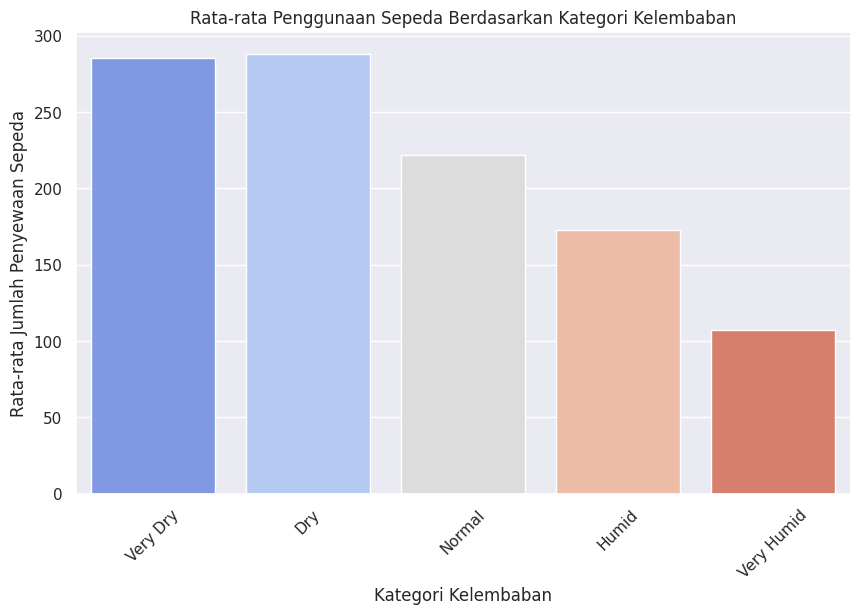

In [692]:
# Membuat grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(x='humidity_category', y='cnt', data=humidity_usage_category, hue='humidity_category', palette='coolwarm', legend=False)
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Kategori Kelembaban')
plt.xlabel('Kategori Kelembaban')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Insight**
- Kelembaban Dry mencapai rata-rata penyewaan sepeda tertinggi yaitu sekitar 288.11. Ini menunjukkan bahwa orang-oraang cenderung menyewa sepeda ketika kelembaban rendah.
- jumlah rata-rata penyewaan sepeda menurun secara signifikan pada kelembaban yang lebih tinggi. Untuk Very Humid dengan rata-rata mencapai 107.24 merupakan penyewaan terendah. Hal ini menunjukkan bahwa kelembaban yang tinggi mengurangi minat orang-orang untuk menyewa sepeda.

## Conclusion

- Pertanyaan 1 : Bagaimana perbandingan jumlah penyewaan sepeda di setiap musim?

Kesimpulan : Dapat disimpulkan bahwa jumlah penyewaan sepeda tertinggi.


berada pada musim gugur atau Fall, disusul Summer, Winter dan Spring.

- Pertanyaan 2 : Apakah ada hubungan antara kondisi cuaca dan jumlah penyewaan sepeda?

Kesimpulan: Dapat disimpulkan bahwa cuaca berhubungan atau mempengaruhi jumlah penyewaan sepeda dengan melihat jumlah rata-rata penyewaan. Cuaca clear atau cerah merupakan cuaca dengan jumlah penyewaan tertinggi.

- Pertanyaan 3: Apakah ada jam tertentu di mana permintaan penyewaan sepeda mencapai puncaknya dan paling rendah?

Kesimpulan : Dapat disimpulkan bahwa penyewaan sepeda tertinggi terjadi pada sekitar jam 17.00 dan penyewaan terendah terjadi pada sekitar jam 04.00. Pada rentang jam 01.00 hingga 04.00 rendah dikarenakan waktu tersebut adalah dini hari. sedangkan dalam rentang jam 16.00 hingga 17.00 memuncak bisa jadi dikarena pada jam tersebut merupakan jam pulang kerja.

- Analisis Lanjutan : Bagaimana Pengaruh Kelembapan udara pada penyewaan sepeda?

Kesimpulan : Kelembapan udara mempengaruhi jumlah penyewaan sepeda. Jumlah penyewaan sepeda tertinggi terjadi ketika tingkat kelembaban Dry, disusul dengan Very Dry yang jumlah penyewaannya tidak terlalu jauh. Very Humid merupakan kategori penyewaan terendah. ini membuktikan orang-orang lebih suka menyewa sepeda saat kelembaban rendah.